In [10]:
%pylab
%matplotlib inline

Using matplotlib backend: Qt4Agg
Populating the interactive namespace from numpy and matplotlib


In [42]:
# Imports
import scipy.io as sio
import sklearn.linear_model as lmod


ex5_data = sio.loadmat('ex5data1')

In [43]:
for key, val in ex5_data.items():
    pass
    try:
        print('ex5_data[{0}].shape = {1}'.format(key, val.shape))      
        
    except Exception as ex:
        pass


ex5_data[ytest].shape = (21, 1)
ex5_data[yval].shape = (21, 1)
ex5_data[Xtest].shape = (21, 1)
ex5_data[Xval].shape = (21, 1)
ex5_data[y].shape = (12, 1)
ex5_data[X].shape = (12, 1)


In [78]:
#Define variables
X = ex5_data['X']

y = ex5_data["y"]
Xtest = ex5_data['Xtest']
ytest = ex5_data['ytest']
Xval = ex5_data['Xval']
yval = ex5_data['yval']


# linear regression
lr = lmod.LinearRegression(normalize=True)
lr.fit(X, y)
ytest_lr = lr.predict(Xtest)

# Linear regression with up to 5th order polynomial features
X5 = np.array([X.squeeze()**n for n in range(1,6)]).transpose()
Xtest5 = np.array([Xtest.squeeze()**n for n in range(1,6)]).transpose()

lr5 = lmod.LinearRegression(normalize=True)
lr5.fit(X5, y)
ytest_lr5 = lr5.predict(Xtest5)

# Ridge regression with GCV to set the parameter
rr5 = lmod.RidgeCV(alphas=[0.00001, .0001, 0.001,0.01], normalize=True)
rr5.fit(X5, y)
print("rr5.alpha_ is {}".format(rr5.alpha_))
ytest_rr5 = rr5.predict(Xtest5)


rr5.alpha_ is 0.001


In [75]:
hub = lmod.LinearRegression

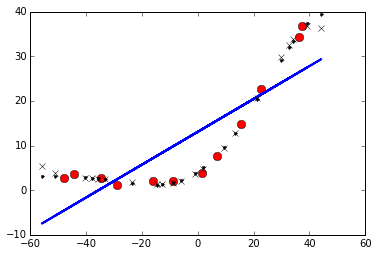

In [79]:
# Plot the data
plot(X.squeeze(), y.squeeze(), linewidth=0, marker='o', c='red', markersize=8)
plot(Xtest.squeeze(), ytest_lr.squeeze(), 'b', linewidth=2)
plot(Xtest.squeeze(), ytest_lr5.squeeze(), 'k', linewidth=0, marker='x')
plot(Xtest.squeeze(), ytest_rr5.squeeze(), 'k', linewidth=0, marker='.')

In [65]:


ytest_lr5.squeeze().shape

(21,)